In [1]:
#Importing libraries

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import KFold
import pickle


In [2]:
df = pd.read_csv("insurance.csv")

In [3]:
print(df.head())

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520


In [4]:
print(df.shape)

(1338, 7)


In [5]:
print(df.columns)

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')


In [6]:
print(df.describe())

               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010


In [7]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None


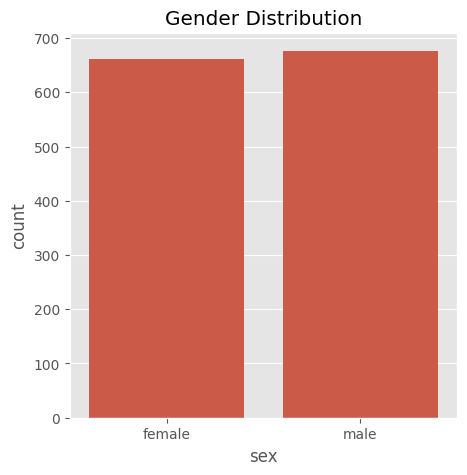

In [8]:
#visualization
plt.figure(figsize=(5,5))
style.use('ggplot')
sns.countplot(x='sex', data=df)
plt.title('Gender Distribution')
plt.show()

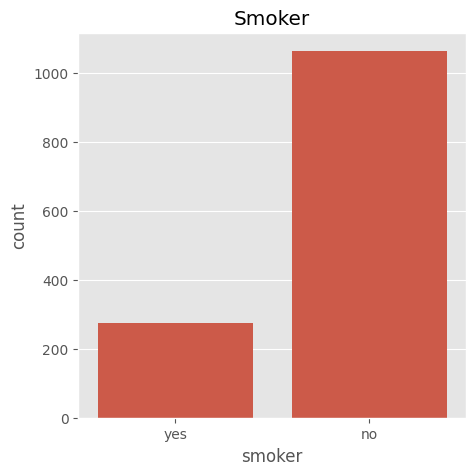

In [9]:
plt.figure(figsize=(5,5))
sns.countplot(x='smoker', data=df)
plt.title('Smoker')
plt.show()

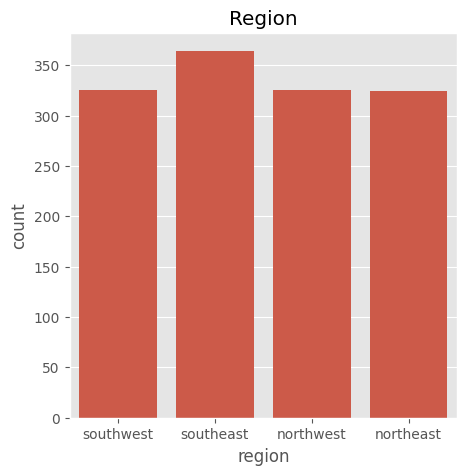

In [10]:
plt.figure(figsize=(5,5))
sns.countplot(x='region', data=df)
plt.title('Region')
plt.show()

Text(0.5, 1.0, 'Charges for smokers')

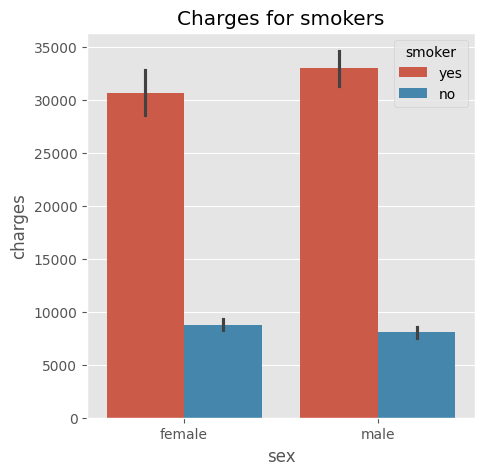

In [11]:
plt.figure(figsize=(5,5))
sns.barplot(x='sex', y='charges',hue='smoker', data=df)
plt.title('Charges for smokers')

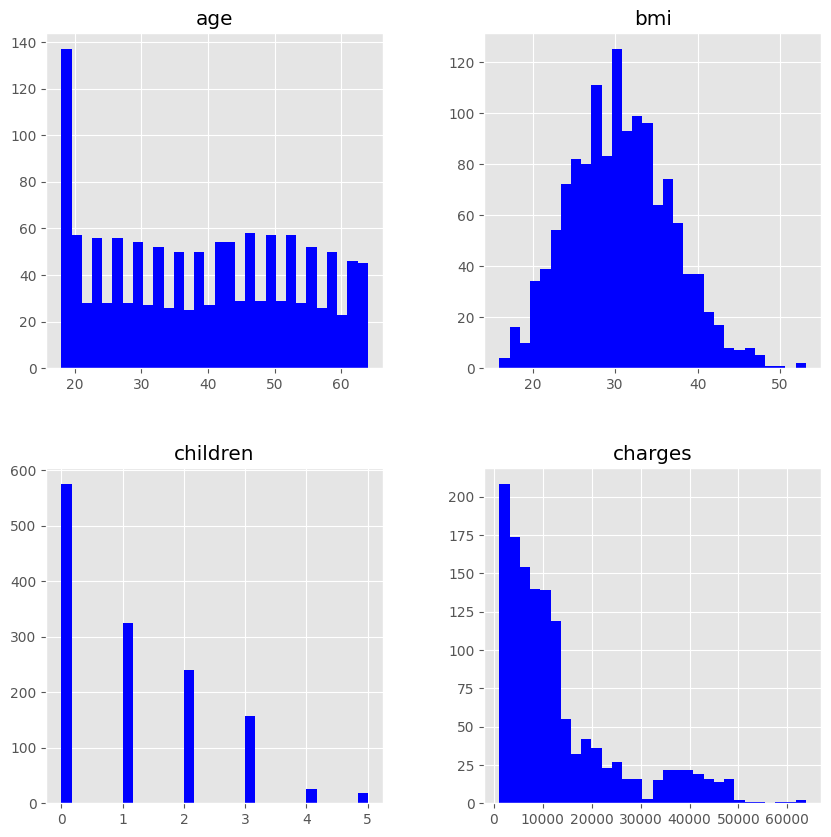

In [12]:
df[['age','bmi','children','charges','sex','smoker','region']].hist(bins=30, figsize=(10,10), color='blue')
plt.show()

In [13]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [14]:
#data preprocessing
df['sex'] = df['sex'].apply({'male':0, 'female':1}.get)
df['smoker'] = df['smoker'].apply({'yes':1, 'no':0}.get)
df['region'] = df['region'].apply({'southwest':1, 'southeast':2, 'northwest':3, 'northeast':4}.get)

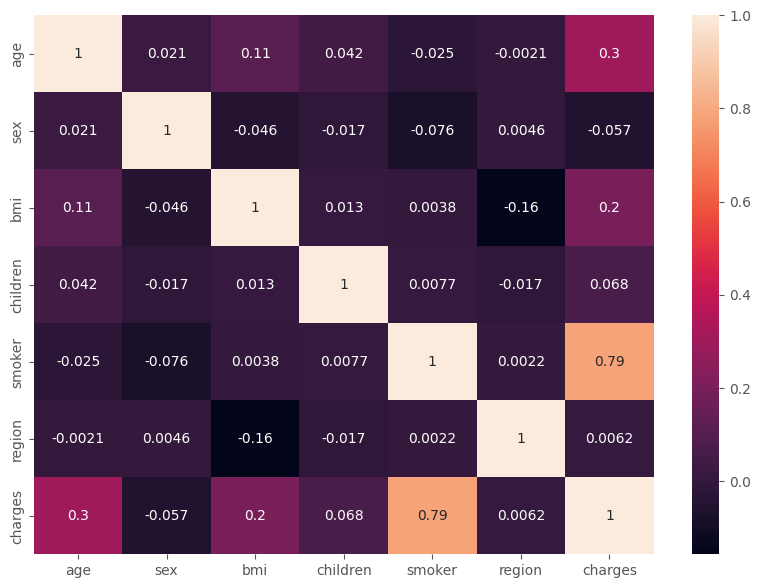

In [15]:
 #Correlation analysis
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(), annot = True)
plt.show()

age            AxesSubplot(0.125,0.11;0.0945122x0.77)
sex         AxesSubplot(0.238415,0.11;0.0945122x0.77)
bmi         AxesSubplot(0.351829,0.11;0.0945122x0.77)
children    AxesSubplot(0.465244,0.11;0.0945122x0.77)
smoker      AxesSubplot(0.578659,0.11;0.0945122x0.77)
region      AxesSubplot(0.692073,0.11;0.0945122x0.77)
charges     AxesSubplot(0.805488,0.11;0.0945122x0.77)
dtype: object

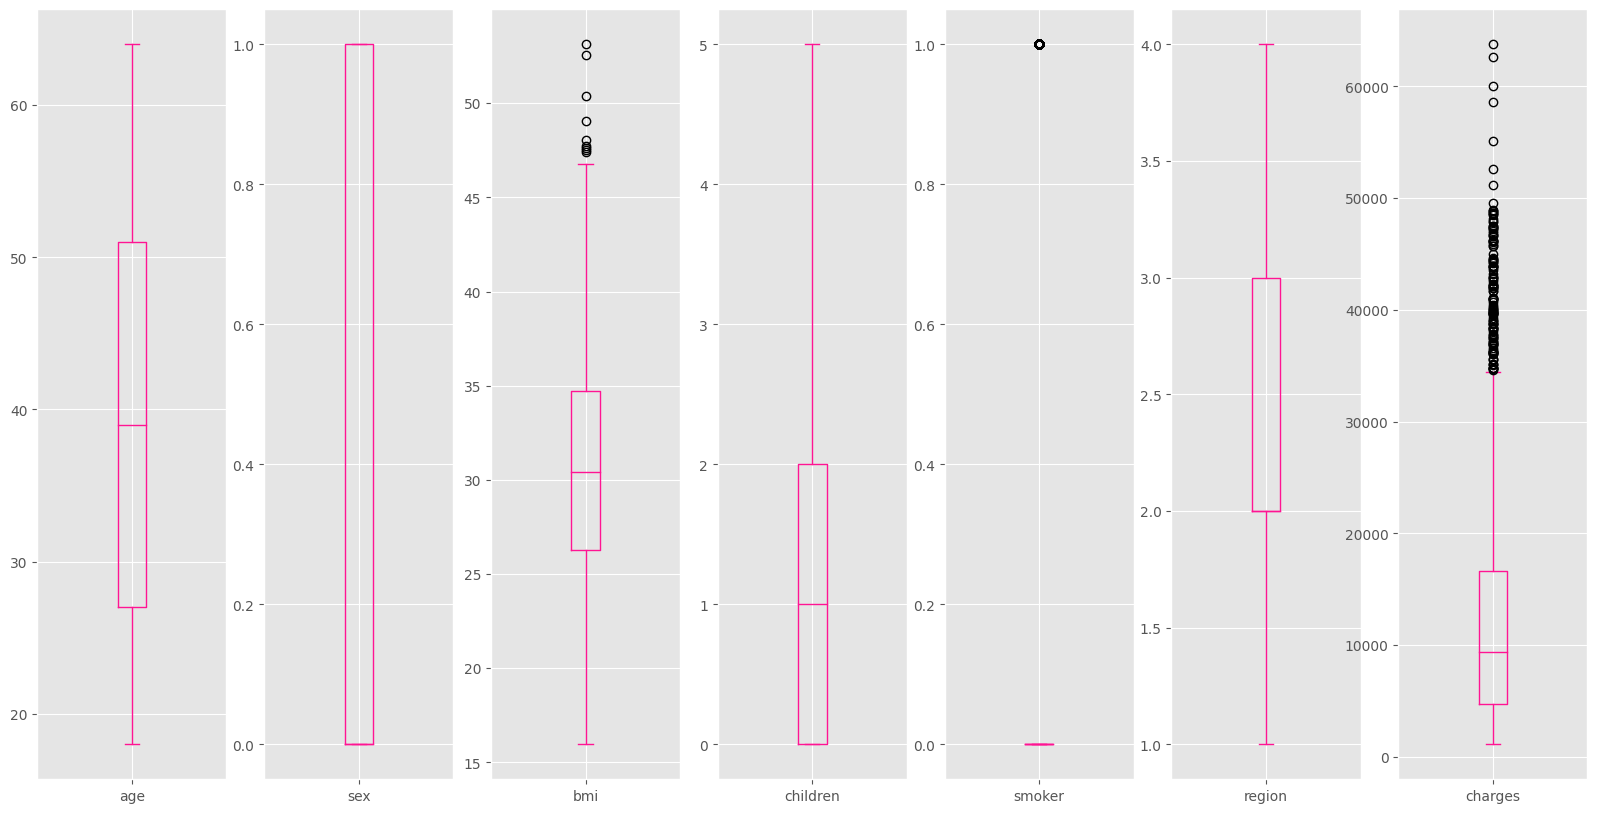

In [16]:
df.plot(kind="box",subplots=True,sharex=False,sharey=False,figsize=(20,10),color='deeppink')

In [17]:
#Data splitting
X = df.drop(['charges'], axis=1)
y = df.charges

In [18]:
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)
print("X_train shape: ", x_train.shape)
print("X_test shape: ", x_test.shape)
print("y_train shape: ", y_train.shape)
print("y_test shape: ", y_test.shape)

X_train shape:  (936, 6)
X_test shape:  (402, 6)
y_train shape:  (936,)
y_test shape:  (402,)


In [19]:
#linear regression
linreg = LinearRegression()
linreg.fit(x_train, y_train)
y_pred_train = linreg.predict(x_train)
y_pred_test = linreg.predict(x_test)
print("train score:",linreg.score(x_train,y_train))
print("test score:",linreg.score(x_test,y_test))

train score: 0.74225713201721
test score: 0.7694415927057693


In [20]:
print('MAE= ',metrics.mean_absolute_error(y_test,y_pred_test))
print('MSE= ',metrics.mean_squared_error(y_test,y_pred_test))
print(f"r2 score: {r2_score(y_test,y_pred_test)}")
print('Adjusted R2 value= ',1 - (1 - (linreg.score(x_test,y_test))) * ((756 - 1)/(756-10-1)))
print('RMSE (train)= ',np.sqrt(mean_squared_error(y_train,y_pred_train)))
print('RMSE (test)= ',np.sqrt(mean_squared_error(y_test,y_pred_test)))

MAE=  4155.239843059381
MSE=  33805466.89868861
r2 score: 0.7694415927057693
Adjusted R2 value=  0.7663468489836991
RMSE (train)=  6144.199195801808
RMSE (test)=  5814.246890069995


In [21]:
data = {'age':50,'sex':0, 'bmi':25, 'children':2, 'smoker':1, 'region':2}
index = [0]
cust_df = pd.DataFrame(data, index)
cust_df

,age,sex,bmi,children,smoker,region
0,50,0,25,2,1,2


In [22]:
cost_pred = linreg.predict(cust_df)
print("The medical insurance cost of the new customer is: ", cost_pred)

The medical insurance cost of the new customer is:  [33256.77873506]


In [23]:
# Fitting Random Forest Regression to the dataset
regressor_rf = RandomForestRegressor(n_estimators=100)
regressor_rf.fit(x_train, y_train)
y_pred_train_rf = regressor_rf.predict(x_train)
y_pred_test_rf = regressor_rf.predict(x_test)
print("train score:",regressor_rf.score(x_train,y_train))
print("test score:",regressor_rf.score(x_test,y_test))


train score: 0.9764634073600731
test score: 0.8555658399218936


In [24]:
print('MAE= ', metrics.mean_absolute_error(y_test, y_pred_test_rf))
print('MSE= ', metrics.mean_squared_error(y_test, y_pred_test_rf))
print(f"r2 score: {r2_score(y_test, y_pred_test_rf)}")
print('Adjusted R2 value= ', 1 - (1 - (regressor_rf.score(x_test, y_test))) * ((756 - 1)/(756-10-1)))
print('RMSE (train)= ', np.sqrt(mean_squared_error(y_train, y_pred_train_rf)))
print('RMSE (test)= ', np.sqrt(mean_squared_error(y_test, y_pred_test_rf)))

MAE=  2501.8792804504983
MSE=  21177558.757721767
r2 score: 0.8555658399218936
Adjusted R2 value=  0.8536271263637982
RMSE (train)=  1856.7086221863067
RMSE (test)=  4601.908164850942


In [25]:
data = {'age':50,'sex':0, 'bmi':25, 'children':2, 'smoker':1, 'region':2}
index = [0]
cust_df = pd.DataFrame(data, index)
cust_df

,age,sex,bmi,children,smoker,region
0,50,0,25,2,1,2


In [26]:
cost_pred = regressor_rf.predict(cust_df)
print("The medical insurance cost of the new customer is: ", cost_pred[0])

The medical insurance cost of the new customer is:  24406.452252400002


In [27]:
# Fitting Decision Tree Regression to the dataset
regressor_dt = DecisionTreeRegressor()
regressor_dt.fit(x_train, y_train)
y_pred_train_dt = regressor_dt.predict(x_train)
y_pred_test_dt = regressor_dt.predict(x_test)
print("train score:", regressor_dt.score(x_train, y_train))
print("test score:", regressor_dt.score(x_test, y_test))

train score: 1.0
test score: 0.7280052290361692


In [28]:
print('MAE= ', metrics.mean_absolute_error(y_test, y_pred_test_dt))
print('MSE= ', metrics.mean_squared_error(y_test, y_pred_test_dt))
print(f"r2 score: {r2_score(y_test, y_pred_test_dt)}")
print('Adjusted R2 value= ', 1 - (1 - (regressor_dt.score(x_test, y_test))) * ((756 - 1)/(756-10-1)))
print('RMSE (train)= ', np.sqrt(mean_squared_error(y_train, y_pred_train_dt)))
print('RMSE (test)= ', np.sqrt(mean_squared_error(y_test, y_pred_test_dt)))

MAE=  2913.57578472388
MSE=  39881045.04339304
r2 score: 0.7280052290361692
Adjusted R2 value=  0.7243542925131647
RMSE (train)=  0.0
RMSE (test)=  6315.144103137555


In [29]:
# K-Fold Cross Validation
kf = KFold(n_splits=7)
for train_index, test_index in kf.split(X):
    print(train_index, test_index)

[ 192  193  194 ... 1335 1336 1337] [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191]
[   0    1    2 ... 1335 1336 1337] [192 193 194 195 196 197 198 199 200 201 202 203 204 205 206 207 208 209
 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224 225 226 227
 2

In [30]:
def get_score(model, X, y, kf):
    scores = []
    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        model.fit(X_train, y_train)
        scores.append(model.score(X_test, y_test))
    return np.mean(scores)

In [31]:
kf = KFold(n_splits=7)
linear_reg = LinearRegression()
rf_reg = RandomForestRegressor(n_estimators=100)
dt_reg = DecisionTreeRegressor()

print("Linear Regression Score:", get_score(linear_reg, X, y, kf))
print("Random Forest Regression Score:", get_score(rf_reg, X, y, kf))
print("Decision Tree Regression Score:", get_score(dt_reg, X, y, kf))

Linear Regression Score: 0.7452991860582022


Random Forest Regression Score: 0.8322677247374696
Decision Tree Regression Score: 0.6930465568293702


In [32]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train,y_train)
pickle.dump(regressor, open('linear_regression_model.pkl','wb'))
model = pickle.load(open('linear_regression_model.pkl','rb'))